In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv('/Users/daviankalopez/Documents/DataEnrichment/data CORE.csv',header=1)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [4]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['State', 'Area', 'Marital', 'Gender', 'Initial_admin',
       'Complication_risk', 'Services'],
      dtype='object')

In [5]:
df.shape

(1000, 32)

In [6]:
df.describe()

,Lat,Lng,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges
count,1000.000000,1000.000000,993.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,...,994.00000,998.000000,992.000000,998.000000,994.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.989277,-91.165542,2.103726,54.084000,40653.044950,0.0,17.992381,4.992000,1.024000,0.366000,...,0.28169,0.346693,0.414315,0.326653,0.396378,0.422000,0.308000,9.267176,3240.971613,13124.934863
std,5.504177,15.451957,2.239293,20.903203,28370.102213,0.0,2.056366,1.048349,1.013139,0.598667,...,0.45005,0.476156,0.492852,0.469224,0.489391,0.494126,0.461898,6.030931,600.413722,6677.691402
min,18.010230,-171.688150,0.000000,18.000000,154.080000,0.0,11.475314,2.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.012586,2022.650007,3241.339760
25%,35.673860,-96.840598,0.000000,36.750000,19295.567500,0.0,16.620469,4.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.518085,2822.108670,8121.383834
50%,39.524835,-88.242890,1.000000,55.000000,34222.550000,0.0,18.020163,5.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.042516,3164.679245,11698.462430
75%,42.130840,-80.602785,3.000000,72.000000,54924.115000,0.0,19.418254,6.000000,2.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.711671,3628.550654,16493.908180
max,70.560990,-66.247510,10.000000,89.000000,204542.410000,0.0,24.565463,9.000000,7.000000,3.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.269743,5572.846022,30087.650940


In [7]:
df['State'].value_counts()

TX    54
CA    52
NY    51
OH    48
PA    45
IL    40
FL    35
VA    34
KS    32
IA    30
MN    28
WV    28
MI    27
OK    27
MO    26
NC    26
NJ    22
WI    22
KY    19
AL    19
WA    19
NE    19
TN    19
OR    18
IN    18
AR    17
GA    16
ME    14
AZ    14
MS    14
NM    12
SD    12
ID    11
CO    11
ND    11
NH    11
SC    11
MA    11
MD    10
LA    10
AK     9
MT     9
CT     9
VT     5
UT     5
RI     3
PR     3
NV     3
DC     2
HI     2
WY     2
Name: State, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [9]:
for col in df.columns:
    print(col)

State
Lat
Lng
Area
Children
Age
Income
Marital
Gender
ReAdmis
VitD_levels
Doc_visits
Full_meals_eaten
vitD_supp
Soft_drink
Initial_admin
HighBlood
Stroke
Complication_risk
Overweight
Arthritis
Diabetes
Hyperlipidemia
BackPain
Anxiety
Allergic_rhinitis
Reflux_esophagitis
Asthma
Services
Initial_days
TotalCharge
Additional_charges


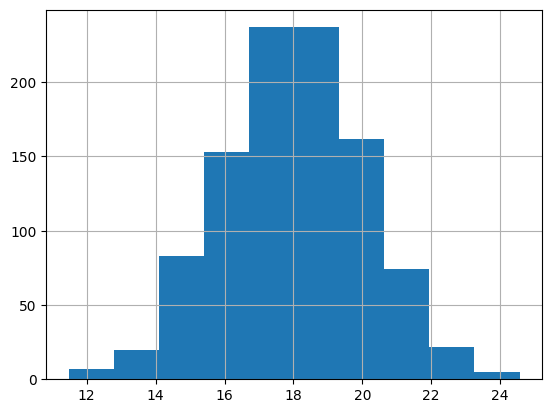

In [10]:
df['VitD_levels'].hist();

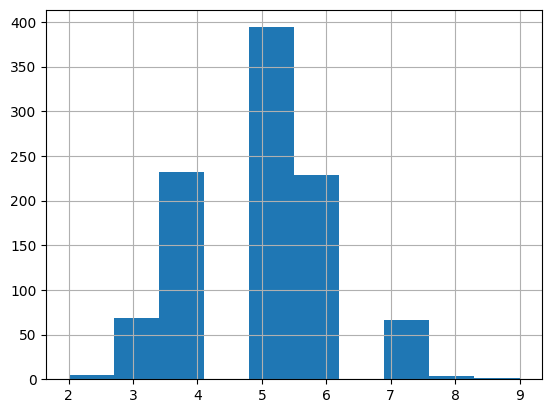

In [11]:
df['Doc_visits'].hist();

<AxesSubplot:>

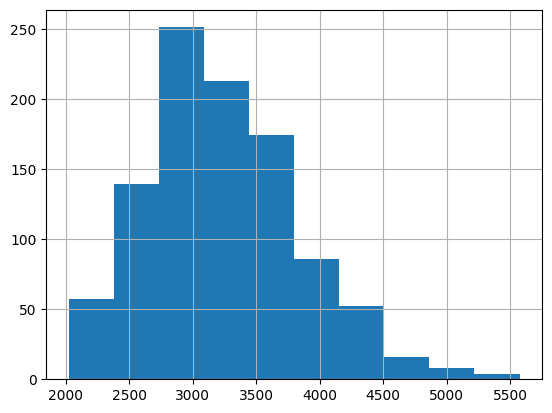

In [12]:
df['TotalCharge'].hist()

For each feature listed:

-1.Plot a histogram with a kde (kernel density estimate)
-2.Add a line for the mean (red)
-3.Add a line for the median (green)
-4.Add a line for for +1 std from the mean (black)
-5.Add a line for the - 1 std from the mean (black)
-6.Highlight the range between +1 and =1 std (yellow)
-part B.Answer the following questions:
-8.Is it Discrete or Continuous?
-9.Does it have a skew? If so, which direction (+/-)
-10.What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

## 1-6 for each of the columns above


Plot a histogram with a kde (kernel density estimate) -2.Add a line for the mean (red) -3.Add a line for the median (green) -4.Add a line for for +1 std from the mean (black) -5.Add a line for the - 1 std from the mean (black) -6.Highlight the range between +1 and =1 std (yellow) 

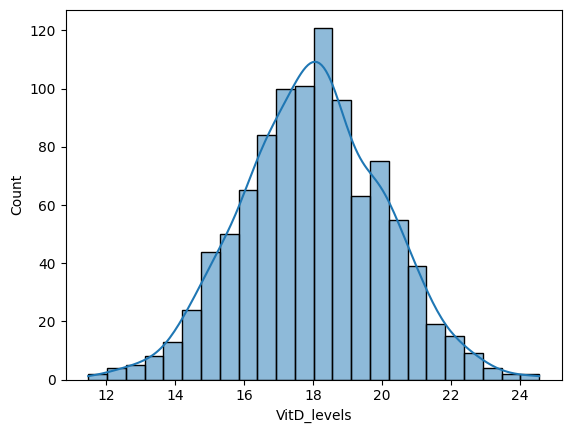

In [13]:
sns.histplot(data=df, x='VitD_levels', kde=True);

In [14]:
stats.normaltest(df['VitD_levels'])

NormaltestResult(statistic=0.039721627680133466, pvalue=0.9803351128910952)

In [15]:
df['VitD_levels'].describe()

count    1000.000000
mean       17.992381
std         2.056366
min        11.475314
25%        16.620469
50%        18.020163
75%        19.418254
max        24.565463
Name: VitD_levels, dtype: float64

In [16]:
df['VitD_levels'].median()

18.020163095

In [17]:
dist_stats=df['VitD_levels'].agg(['mean','min','std', 'max','median'])
dist_stats

mean      17.992381
min       11.475314
std        2.056366
max       24.565463
median    18.020163
Name: VitD_levels, dtype: float64

In [18]:
xs= np.linspace(dist_stats.loc['min'],dist_stats.loc['max'],)
xs

array([11.47531413, 11.74246002, 12.00960591, 12.27675181, 12.5438977 ,
       12.81104359, 13.07818948, 13.34533537, 13.61248127, 13.87962716,
       14.14677305, 14.41391894, 14.68106483, 14.94821073, 15.21535662,
       15.48250251, 15.7496484 , 16.01679429, 16.28394019, 16.55108608,
       16.81823197, 17.08537786, 17.35252375, 17.61966965, 17.88681554,
       18.15396143, 18.42110732, 18.68825322, 18.95539911, 19.222545  ,
       19.48969089, 19.75683678, 20.02398268, 20.29112857, 20.55827446,
       20.82542035, 21.09256624, 21.35971214, 21.62685803, 21.89400392,
       22.16114981, 22.4282957 , 22.6954416 , 22.96258749, 23.22973338,
       23.49687927, 23.76402516, 24.03117106, 24.29831695, 24.56546284])

In [19]:
#use stats.norm.pdf to get the curve that corresponds to the distribution s values
ys=stats.norm.pdf(xs, loc=dist_stats.loc['mean'], scale= dist_stats.loc['std'])
ys

array([0.00127879, 0.00191399, 0.00281678, 0.00407601, 0.00579948,
       0.00811358, 0.01116109, 0.01509632, 0.02007733, 0.02625495,
       0.03375879, 0.04268084, 0.05305782, 0.06485392, 0.07794593,
       0.09211304, 0.10703335, 0.12228904, 0.1373809 , 0.1517524 ,
       0.164822  , 0.17602127, 0.18483557, 0.19084304, 0.19374812,
       0.1934056 , 0.18983269, 0.18320755, 0.17385457, 0.16221807,
       0.14882736, 0.13425692, 0.11908608, 0.10386177, 0.08906782,
       0.07510283, 0.06226761, 0.05076197, 0.04068976, 0.03207024,
       0.02485362, 0.01893858, 0.01418978, 0.0104538 , 0.00757257,
       0.00539365, 0.0037774 , 0.00260119, 0.00176126, 0.00117259])

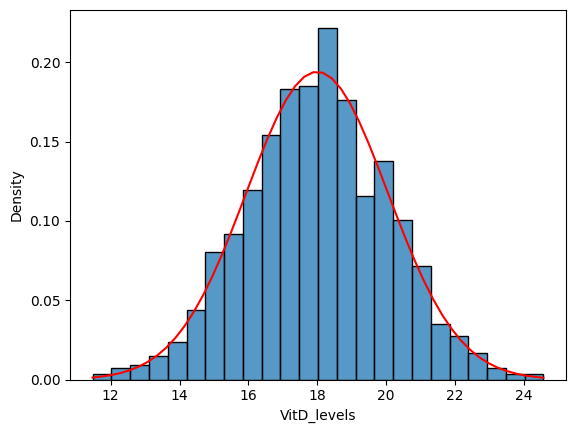

In [20]:
#plot the histagain and then plot the pdf calculated
ax=sns.histplot(data=df, x='VitD_levels', stat ='density')
ax.plot(xs,ys, color = 'red');


In [21]:
data = df['VitD_levels']

''

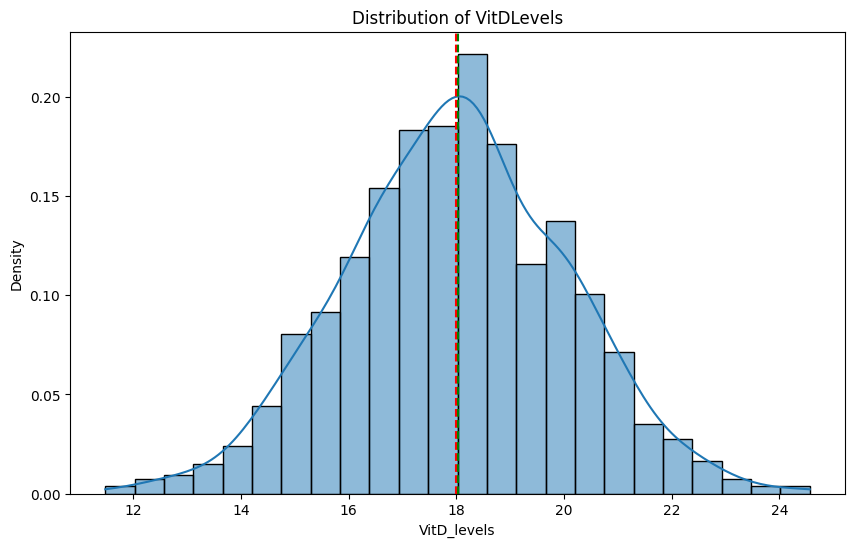

In [22]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=False)
ax.set_title('Distribution of VitDLevels')
ax.axvline(17.99,color='red',ls='--')
ax.axvline(18.02,color='green',ls='--')
;

In [23]:
#use cumulative density function to find prob of 18 or lower
p_18=stats.norm.cdf(17.99,loc=dist_stats.loc['std'])
p_18

1.0

In [24]:
#calc 1- prob of mean or lower
1-p_18

0.0

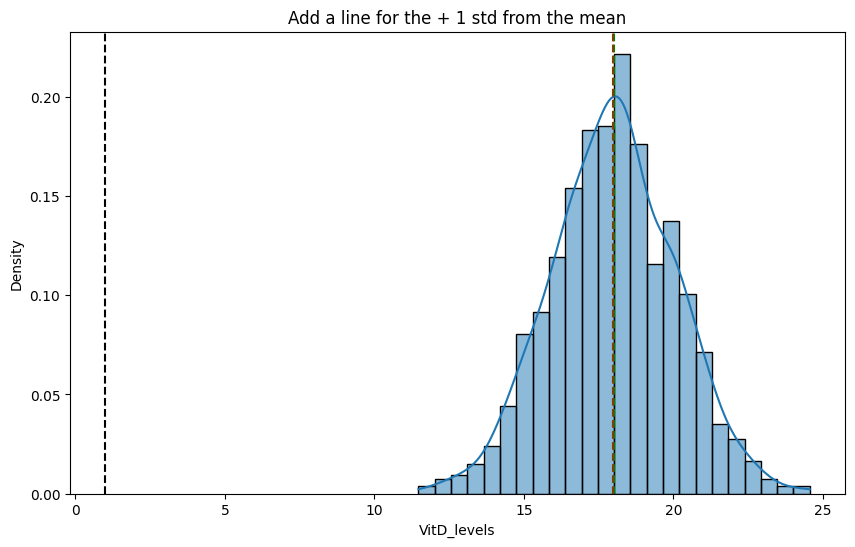

In [25]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=False)
ax.set_title('Add a line for the + 1 std from the mean')
ax.axvline(17.99,color='red',ls='--')
ax.axvline(18.02,color='green',ls='--')


ax.axvline(1,color='black',ls='--');


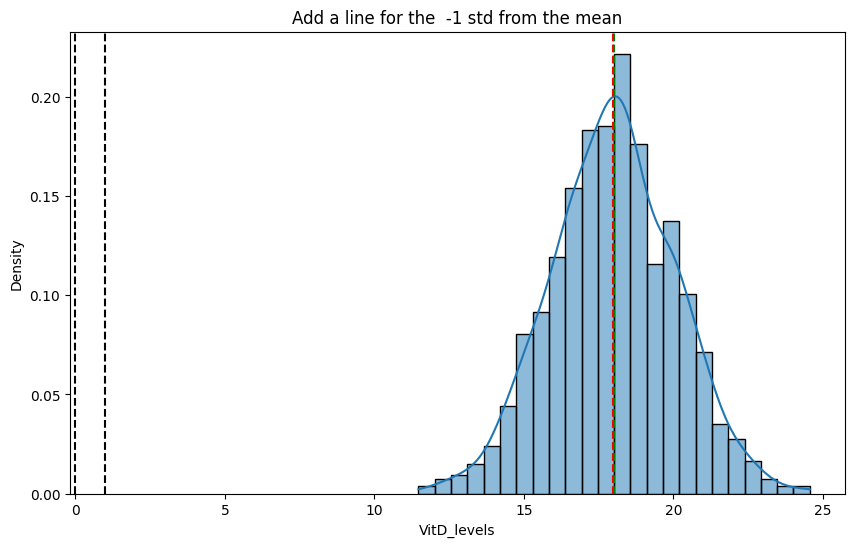

In [26]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=False)
ax.set_title('Add a line for the  -1 std from the mean')
ax.axvline(17.99,color='red',ls='--')
ax.axvline(18.02,color='green',ls='--')
ax.axvline(1,color='black',ls='--')
ax.axvline(0,color='black',ls='--');

## Doc Visits


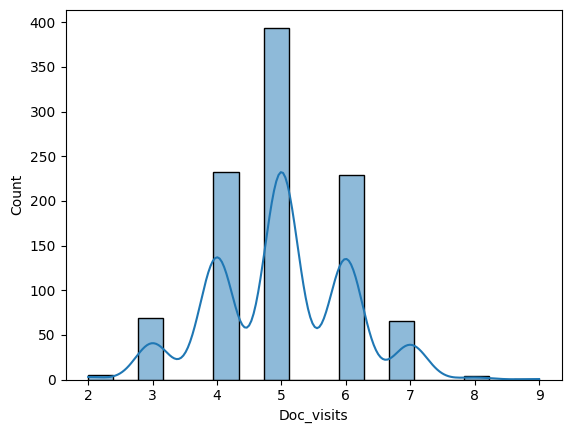

In [27]:
sns.histplot(data=df, x='Doc_visits', kde=True, );

In [28]:
stats.normaltest(df['Doc_visits'])

NormaltestResult(statistic=0.17258400399640103, pvalue=0.9173263309867027)

In [29]:
df['Doc_visits'].median()

5.0

In [30]:
dist_stats=df['Doc_visits'].agg(['mean','min','std', 'max','median'])
dist_stats

mean      4.992000
min       2.000000
std       1.048349
max       9.000000
median    5.000000
Name: Doc_visits, dtype: float64

In [31]:
#use stats.norm.pdf to get the curve that corresponds to the distribution s values
ys_doc=stats.norm.pdf(xs, loc=dist_stats.loc['mean'], scale= dist_stats.loc['std'])
ys_doc

array([1.88563003e-09, 3.77522355e-10, 7.08316764e-11, 1.24540621e-11,
       2.05207480e-12, 3.16864809e-13, 4.58514937e-14, 6.21772664e-15,
       7.90147953e-16, 9.40987539e-17, 1.05016607e-17, 1.09832471e-18,
       1.07647062e-19, 9.88717599e-21, 8.51022432e-22, 6.86449209e-23,
       5.18889004e-24, 3.67569261e-25, 2.44007154e-26, 1.51797491e-27,
       8.84963349e-29, 4.83486814e-30, 2.47538435e-31, 1.18767963e-32,
       5.34016443e-34, 2.25013519e-35, 8.88507812e-37, 3.28785418e-38,
       1.14015134e-39, 3.70519541e-41, 1.12838782e-42, 3.22035922e-44,
       8.61289010e-46, 2.15869930e-47, 5.07030465e-49, 1.11602678e-50,
       2.30204515e-52, 4.44991499e-54, 8.06098754e-56, 1.36843270e-57,
       2.17699432e-59, 3.24556122e-61, 4.53441195e-63, 5.93677786e-65,
       7.28415675e-67, 8.37541673e-69, 9.02468859e-71, 9.11290165e-73,
       8.62342517e-75, 7.64718459e-77])

In [32]:
xs_doc= np.linspace(dist_stats.loc['min'],dist_stats.loc['max'],)
xs_doc

array([2.        , 2.14285714, 2.28571429, 2.42857143, 2.57142857,
       2.71428571, 2.85714286, 3.        , 3.14285714, 3.28571429,
       3.42857143, 3.57142857, 3.71428571, 3.85714286, 4.        ,
       4.14285714, 4.28571429, 4.42857143, 4.57142857, 4.71428571,
       4.85714286, 5.        , 5.14285714, 5.28571429, 5.42857143,
       5.57142857, 5.71428571, 5.85714286, 6.        , 6.14285714,
       6.28571429, 6.42857143, 6.57142857, 6.71428571, 6.85714286,
       7.        , 7.14285714, 7.28571429, 7.42857143, 7.57142857,
       7.71428571, 7.85714286, 8.        , 8.14285714, 8.28571429,
       8.42857143, 8.57142857, 8.71428571, 8.85714286, 9.        ])

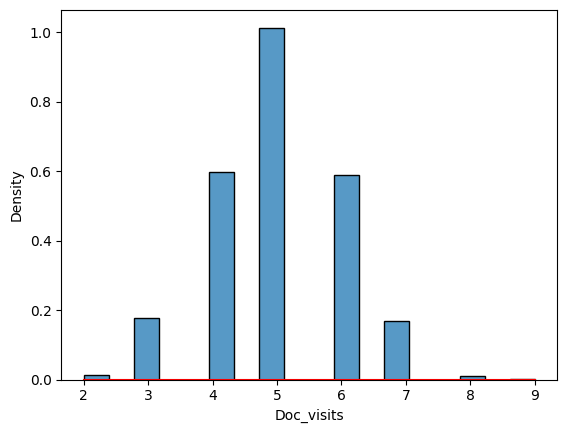

In [33]:
#plot the hist again and then plot the pdf calculated
doc_ax=sns.histplot(data=df, x='Doc_visits', stat ='density')
doc_ax.plot(xs_doc,ys_doc, color = 'red');

In [34]:
doc_data=df['Doc_visits']

''

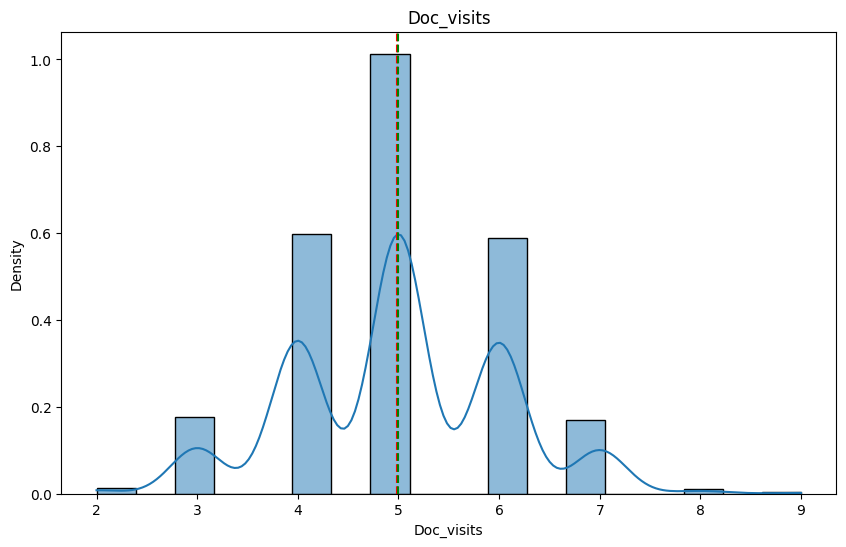

In [35]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=doc_data, stat='density',kde=True,cumulative=False)
ax.set_title('Doc_visits')
ax.axvline(4.99,color='red',ls='--')
ax.axvline(5,color='green',ls='--')
;

In [36]:
p_5=stats.norm.cdf(4.99,loc=dist_stats.loc['std'])
p_5

0.999959538714959

In [37]:
#calc 1- prob of mean or lower
1-p_5

4.046128504098245e-05

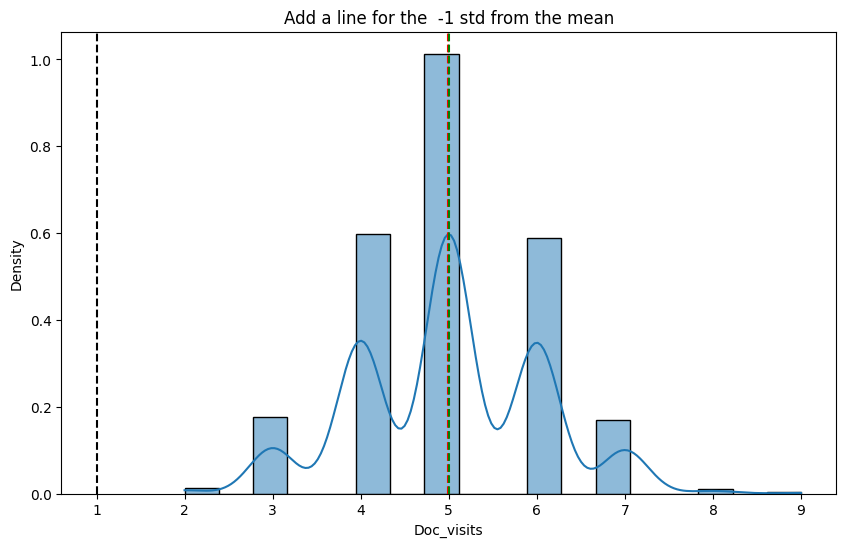

In [38]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=doc_data, stat='density',kde=True,cumulative=False)
ax.set_title('Add a line for the  -1 std from the mean')
ax.axvline(4.99,color='red',ls='--')
ax.axvline(5,color='green',ls='--')
ax.axvline(1,color='black',ls='--');

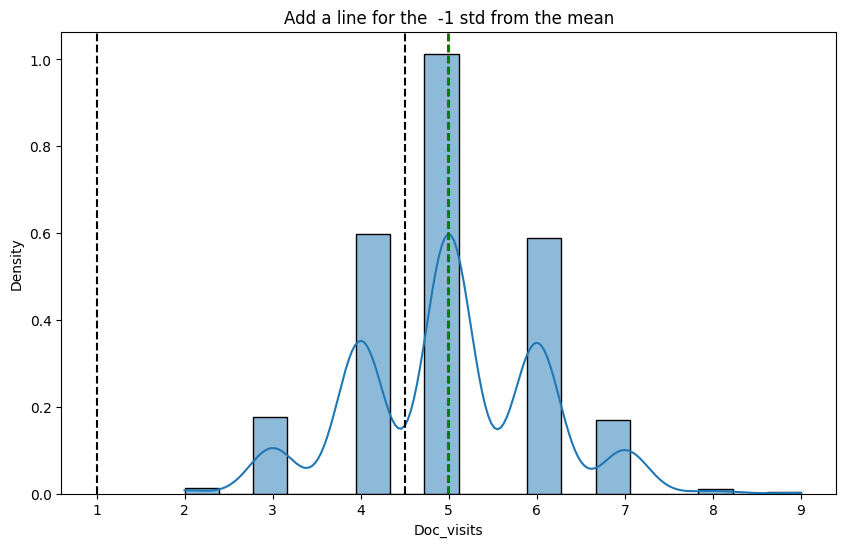

In [39]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=doc_data, stat='density',kde=True,cumulative=False)
ax.set_title('Add a line for the  -1 std from the mean')
ax.axvline(4.99,color='red',ls='--')
ax.axvline(5,color='green',ls='--')
ax.axvline(1,color='black',ls='--')
ax.axvline(4.5,color='black',ls='--');

## Total Charge

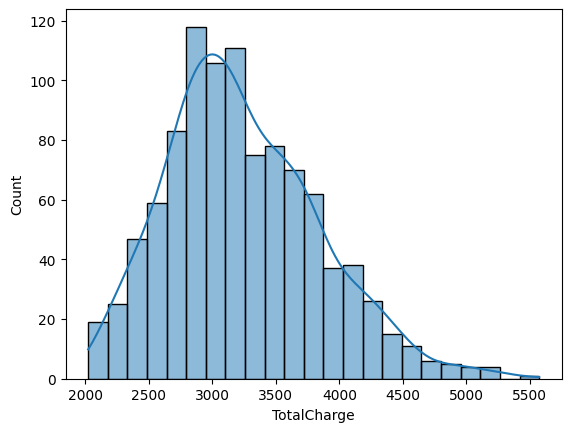

In [40]:
sns.histplot(data=df, x='TotalCharge', kde=True, );

In [41]:
stats.normaltest(df['TotalCharge'])

NormaltestResult(statistic=52.72154516973212, pvalue=3.5617376548081327e-12)

In [42]:
dist_stats=df['TotalCharge'].agg(['mean','min','std', 'max','median'])
dist_stats

mean      3240.971613
min       2022.650007
std        600.413722
max       5572.846022
median    3164.679245
Name: TotalCharge, dtype: float64

In [43]:
df['TotalCharge'].median()

3164.6792455

In [44]:
xs_total= np.linspace(dist_stats.loc['min'],dist_stats.loc['max'],)
xs_total

array([2022.650007  , 2095.1029869 , 2167.5559668 , 2240.00894669,
       2312.46192659, 2384.91490649, 2457.36788639, 2529.82086629,
       2602.27384618, 2674.72682608, 2747.17980598, 2819.63278588,
       2892.08576578, 2964.53874567, 3036.99172557, 3109.44470547,
       3181.89768537, 3254.35066527, 3326.80364516, 3399.25662506,
       3471.70960496, 3544.16258486, 3616.61556476, 3689.06854465,
       3761.52152455, 3833.97450445, 3906.42748435, 3978.88046424,
       4051.33344414, 4123.78642404, 4196.23940394, 4268.69238384,
       4341.14536373, 4413.59834363, 4486.05132353, 4558.50430343,
       4630.95728333, 4703.41026322, 4775.86324312, 4848.31622302,
       4920.76920292, 4993.22218282, 5065.67516271, 5138.12814261,
       5210.58112251, 5283.03410241, 5355.48708231, 5427.9400622 ,
       5500.3930421 , 5572.846022  ])

In [45]:
ys_total=stats.norm.pdf(xs, loc=dist_stats.loc['mean'], scale= dist_stats.loc['std'])
ys_total

array([3.46817884e-10, 3.47648854e-10, 3.48481746e-10, 3.49316564e-10,
       3.50153313e-10, 3.50991997e-10, 3.51832620e-10, 3.52675186e-10,
       3.53519700e-10, 3.54366166e-10, 3.55214589e-10, 3.56064972e-10,
       3.56917321e-10, 3.57771639e-10, 3.58627931e-10, 3.59486202e-10,
       3.60346455e-10, 3.61208695e-10, 3.62072927e-10, 3.62939154e-10,
       3.63807382e-10, 3.64677615e-10, 3.65549857e-10, 3.66424112e-10,
       3.67300386e-10, 3.68178683e-10, 3.69059006e-10, 3.69941361e-10,
       3.70825753e-10, 3.71712185e-10, 3.72600662e-10, 3.73491189e-10,
       3.74383770e-10, 3.75278410e-10, 3.76175114e-10, 3.77073885e-10,
       3.77974729e-10, 3.78877650e-10, 3.79782653e-10, 3.80689742e-10,
       3.81598922e-10, 3.82510198e-10, 3.83423574e-10, 3.84339055e-10,
       3.85256646e-10, 3.86176351e-10, 3.87098174e-10, 3.88022122e-10,
       3.88948197e-10, 3.89876406e-10])

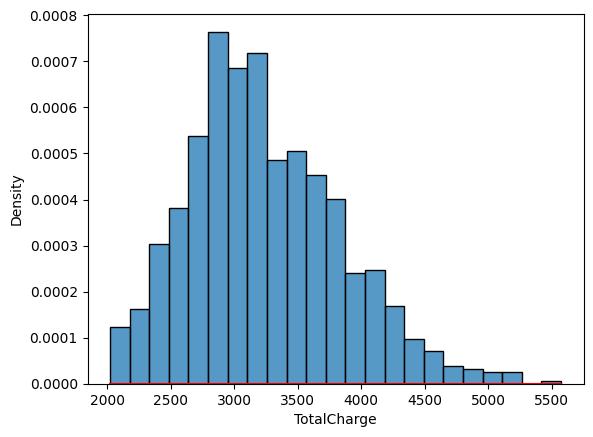

In [46]:
#plot the hist again and then plot the pdf calculated
doc_ax=sns.histplot(data=df, x='TotalCharge', stat ='density')
doc_ax.plot(xs_total,ys_total, color = 'red');

In [47]:
total_data=df['TotalCharge']

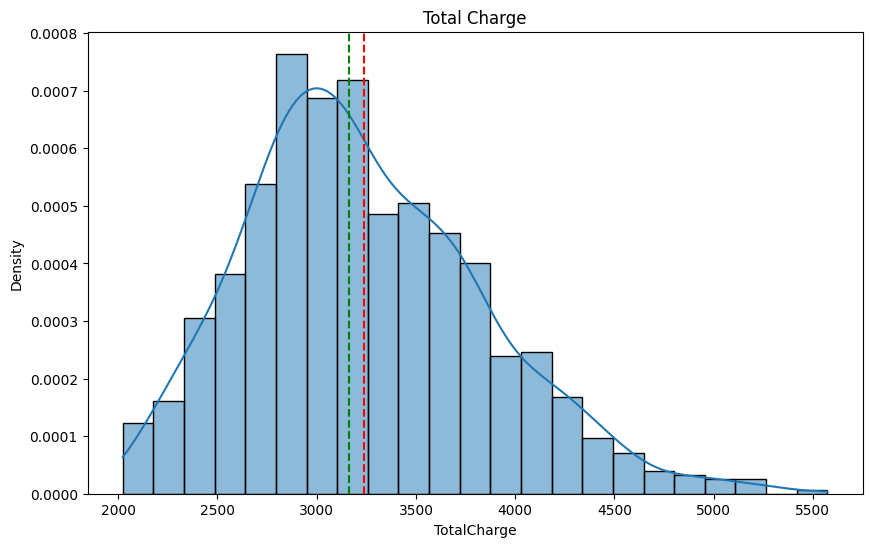

In [48]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=total_data, stat='density',kde=True,cumulative=False)
ax.set_title('Total Charge')
ax.axvline(3240,color='red',ls='--')
ax.axvline(3165,color='green',ls='--');

In [49]:
total_data=df['TotalCharge']

In [50]:
p_3240=stats.norm.cdf(3240,loc=dist_stats.loc['std'])
p_3240

1.0

In [51]:
#calc 1- prob of mean or lower
1-p_3240

0.0